# Assignment 2 (5 Marks)

Our dataset contains daily worldwide COVID-19 data. It is downloaded from: https://ourworldindata.org/coronavirus-source-data. Please plot the following visualizations. 

Please submit the ipynb file only.

# Question 1
Please plot the number of total cases (on March 1st, 2021) for each country on a world map.

Text(0.5, 1.0, 'Total Covid-19 Cases: March 1st 2021')

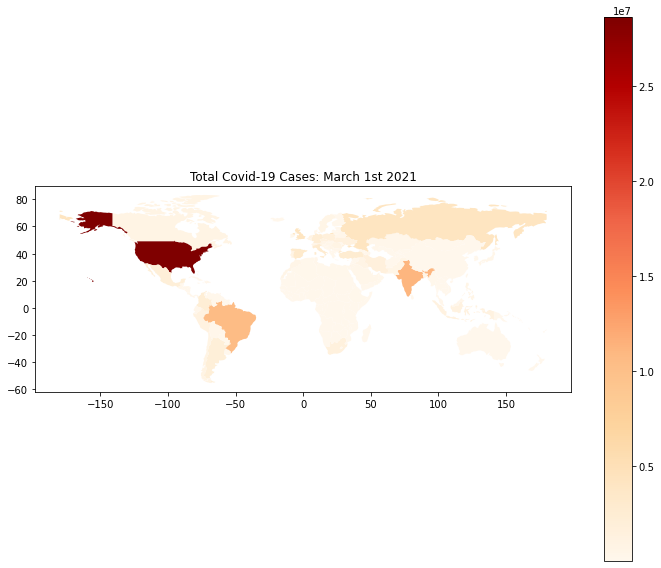

In [9]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt

df = pd.read_csv('owid-covid-data.csv')

df.rename(columns = {'iso_code':'iso'},inplace = True)
df1 = df[['location','date','total_cases','iso']]
wrld = df1[df1['date'] == '2021-03-01']


df2 = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
df2.rename(columns = {'iso_a3':'iso'},inplace = True)
df2 = pd.merge(df2,wrld,how='left',on='iso')

df2.plot(column= 'total_cases',figsize=(12,10),legend = True,cmap = 'OrRd')
plt.title("Total Covid-19 Cases: March 1st 2021")



# Question 2
Visualize the time series for Canada's daily new cases (2020/01/26-2021/03/09). Smooth the time series using simple moving average with window size 5 (start the smoothing curve from the end of the first window).

In [10]:


info = pd.read_csv('owid-covid-data.csv',index_col = 'date',parse_dates = True)
fd = info[info['location'] == 'Canada']
fd = fd[['new_cases']]

fd.head()


,new_cases
date,
2020-01-26,1.0
2020-01-27,0.0
2020-01-28,1.0
2020-01-29,0.0
2020-01-30,0.0


Text(0.5, 0, 'Time Series')

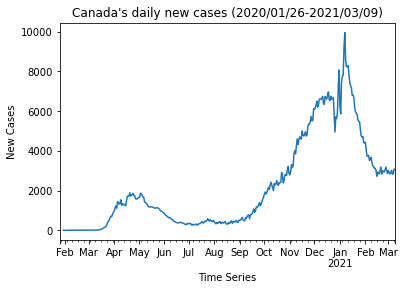

In [11]:
%matplotlib inline
bd =  fd['new_cases'].rolling(window = 5).mean()
bd.plot()
plt.title("Canada's daily new cases (2020/01/26-2021/03/09)")
plt.ylabel("New Cases")
plt.xlabel("Time Series")